# Name : KUMARA B.W.J.C.
# Index No: 190328V

In [1]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 


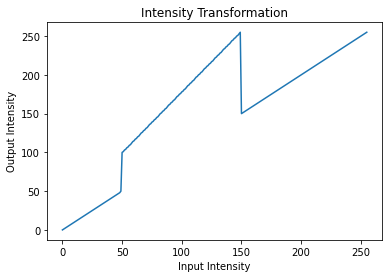

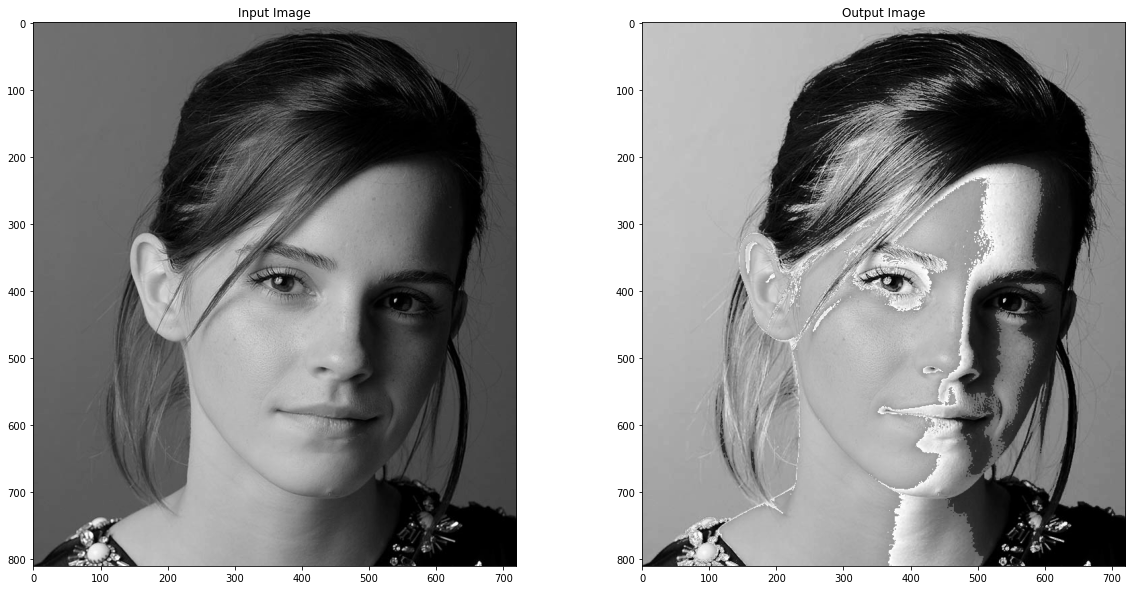

In [2]:
# Q01

img = cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

# Creating the Intensity transformation array
t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4,t5),axis =0).astype(np.uint8)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(t)
ax.set_title('Intensity Transformation')
ax.set_ylabel('Output Intensity')
ax.set_xlabel('Input Intensity')
plt.show()

assert len(t) == 256

fig_o, ax_o = plt.subplots(1,2,figsize = (20,10),facecolor = 'white')

t_img = cv.LUT(img,t)

ax_o[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[0].set_title('Input Image')
ax_o[1].imshow(t_img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[1].set_title('Output Image')


plt.show()

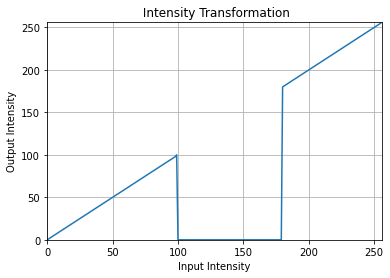

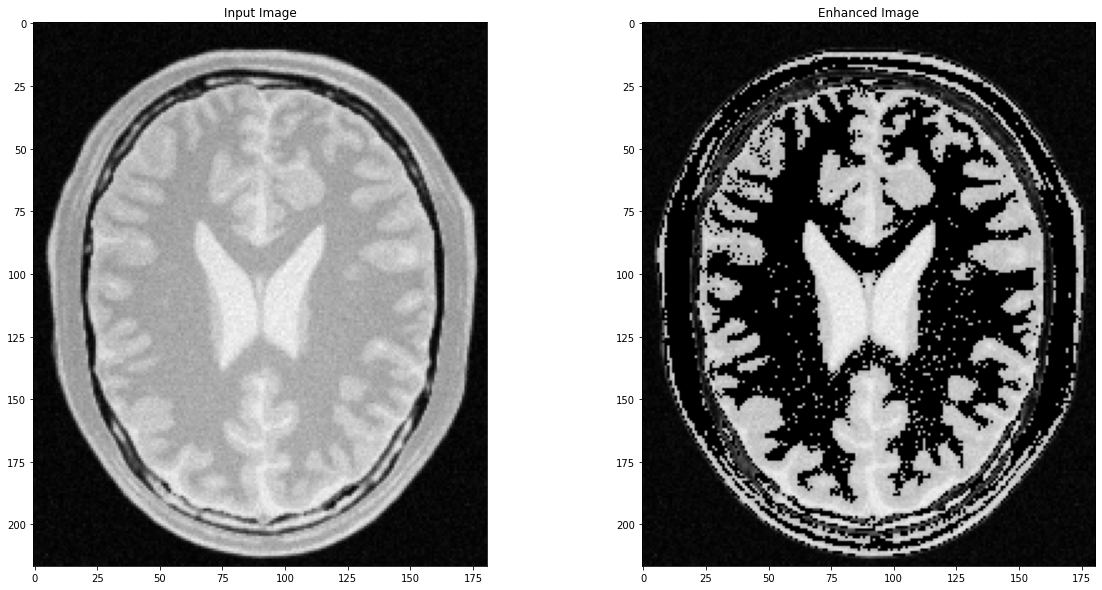

In [13]:
# Q02

img = cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,100,100)
t2 = np.linspace(100,0,0)
t3 = np.linspace(0,0,80)
t4 = np.linspace(0,180,0)
t5 = np.linspace(180,255,76)
t = np.concatenate((t1,t2,t3,t4,t5),axis =0).astype(np.uint8)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(t)
ax.set_title(' Intensity Transformation')
ax.set_ylabel('Output Intensity')
ax.set_xlabel('Input Intensity')
ax.grid('on')
plt.xlim([0,256])
plt.ylim([0,256])
plt.show()

assert len(t) == 256

fig_o, ax_o = plt.subplots(1,2,figsize = (20,10),facecolor = 'white')

t_img = cv.LUT(img,t)

ax_o[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[0].set_title('Input Image')
ax_o[1].imshow(t_img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[1].set_title('Enhanced Image')


plt.show()

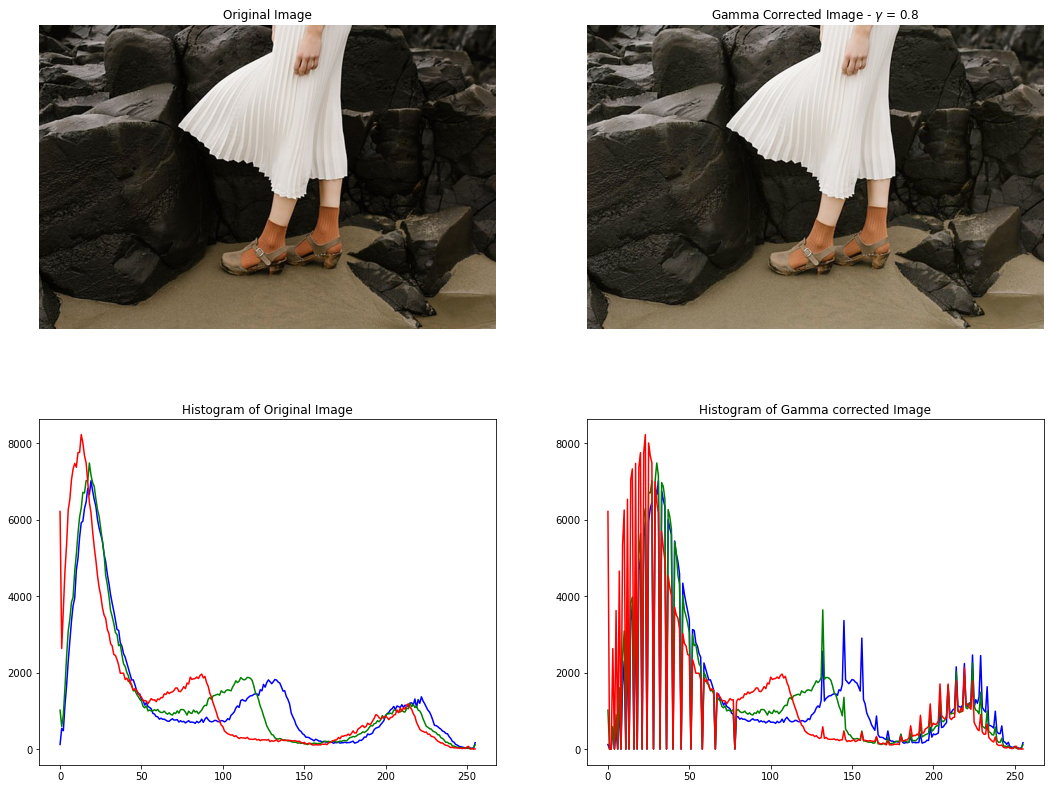

In [4]:
# Q03


gamma =0.8 # Selece Gamma Value

img_orig = cv.imread(r'./Images/highlights_and_shadows.jpg')

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table)

img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)

fig , ax = plt.subplots(2,2,figsize = (18,14),facecolor ='white')

ax[0,0].imshow(img_orig)
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')
ax[0,1].imshow(img_gamma)
ax[0,1].set_title("Gamma Corrected Image - $\gamma$ = {}".format(gamma))
ax[0,1].axis('off')

color = ('b','g','r')


for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig],[i],None,[256],[0,256])
    ax[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma],[i],None,[256],[0,256])
    ax[1,1].plot(hist_gamma, color = c)

ax[1,0].set_title("Histogram of Original Image")
ax[1,1].set_title("Histogram of Gamma corrected Image")
plt.show()

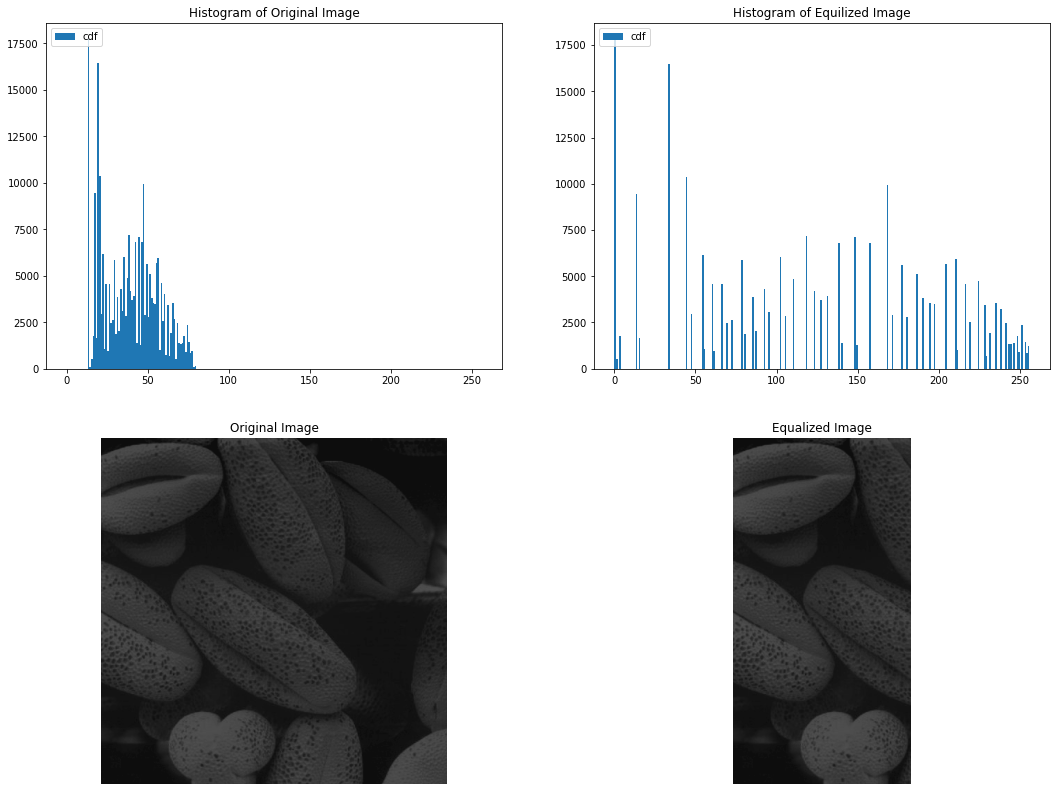

In [30]:
# Q04

img = cv.imread(r'./Images/shells.png',cv.IMREAD_GRAYSCALE)
img_orig =img
fig , ax = plt.subplots(2,2,figsize = (18,14),facecolor ='white')

ax[0,0].hist(img.flatten(), 256,[0,256])
plt.xlim([0,256])
ax[0,0].legend(('cdf','histogram'),loc ='upper left')
ax[0,0].set_title('Histogram of Original Image')

ax[0,1].hist(equ.flatten(), 256,[0,256])
plt.xlim([0,256])
ax[0,1].legend(('cdf','histogram'),loc = 'upper left')
ax[0,1].set_title('Histogram of Equilized Image')
res = np.hstack((img,equ))

ax[1,0].imshow(img_orig,cmap = 'gray',vmin = 0, vmax =255)
ax[1,0].set_title("Original Image")
ax[1,0].axis('off')
ax[1,1].imshow(res,cmap = 'gray',vmin = 0, vmax =255)
ax[1,1].set_title("Equalized Image")
ax[1,1].axis('off')
plt.show()
